In [1]:
%matplotlib inline

import dateutil.parser
import datetime
import matplotlib.dates as mdates


import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.contrib import learn

from pymongo import MongoClient
from bson.objectid import ObjectId

from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data, load_csvdata

In [2]:
LOG_DIR = './ops_logs/data_stock_sp0'
TIMESTEPS = 1
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 1
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
def load_stock_frame(filename):
    data_raw = pd.read_csv(filename, dtype={'TIME': str})
    #data_raw['MEANALL'] = data_raw['MEANALL'].astype(float)
    data_raw['MEANSP'] = data_raw['MEANSP'].astype(float)
    #data_raw['STOCK'] = data_raw['STOCK'].astype(float)
    times = []
    for index, row in data_raw.iterrows():
        _t = datetime.datetime.strptime(row['TIME'], "%y%m%d")
        times.append(_t)
        
    data_raw['_time'] = pd.Series(times, index=data_raw.index)
    #df = pd.DataFrame(data_raw, columns=['TIME', 'MEANALL'])
    df = pd.DataFrame(data_raw, columns=['TIME', 'MEANSP'])
    #df = pd.DataFrame(data_raw, columns=['TIME', 'STOCK'])
    return df.set_index('TIME')

In [4]:
data_stock = load_stock_frame("mydata/dailydata4.csv")
X, y = load_csvdata(data_stock, TIMESTEPS, seperate=False)

In [5]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f304765cd10>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [6]:
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'],
             monitors=[validation_monitor],
             batch_size=BATCH_SIZE,
             steps=TRAINING_STEPS)

predicted = regressor.predict(X['test'])

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./ops_logs/data_stock_sp0/model.ckpt.
INFO:tensorflow:loss = 226.105, step = 1
INFO:tensorflow:global_step/sec: 921.26
INFO:tensorflow:loss = 187.958, step = 101 (0.109 sec)
INFO:tensorflow:global_step/sec: 1068.02
INFO:tensorflow:loss = 520.207, step = 201 (0.094 sec)
INFO:tensorflow:global_step/sec: 1064.06
INFO:tensorflow:loss = 817.089, step = 301 (0.094 sec)
INFO:tensorflow:global_step/sec: 878.896
INFO:tensorflow:loss = 473.289, step = 401 (0.114 sec)
INFO:tensorflow:global_step/sec: 1011.63
INFO:tensorflow:

/usr/local/lib/python2.7/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-09-21-06:14:34
INFO:tensorflow:Restoring parameters from ./ops_logs/data_stock_sp0/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2017-09-21-06:14:34
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 416.365
INFO:tensorflow:Validation (step 1000): loss = 416.365, global_step = 1
INFO:tensorflow:global_step/sec: 129.431
INFO:tensorflow:loss = 185.331, step = 1001 (0.773 sec)
INFO:tensorflow:global_step/sec: 986.213
INFO:tensorflow:loss = 677.68, step = 1101 (0.101 sec)
INFO:tensorflow:global_step/sec: 949.795
INFO:tensorflow:loss = 220.579, step = 1201 (0.105 sec)
INFO:tensorflow:global_step/sec: 993.659
INFO:tensorflow:loss = 185.3, step = 1301 (0.101 sec)
INFO:tensorflow:global_step/sec: 924.481
INFO:tensorflow:loss = 239.124, step = 1401 (0.108 sec)
INFO:tensorflow:global_step/sec: 885.769
INFO:tensorflow:loss = 201.908, step = 1501 (0.113 sec)
INFO:tensorflow:global_step/sec: 937.744
INFO:tensorflow:loss = 1353.63

INFO:tensorflow:loss = 325.828, step = 9001 (0.105 sec)
INFO:tensorflow:global_step/sec: 913.509
INFO:tensorflow:loss = 554.793, step = 9101 (0.109 sec)
INFO:tensorflow:global_step/sec: 947.769
INFO:tensorflow:loss = 199.99, step = 9201 (0.106 sec)
INFO:tensorflow:global_step/sec: 955.978
INFO:tensorflow:loss = 487.086, step = 9301 (0.105 sec)
INFO:tensorflow:global_step/sec: 962.964
INFO:tensorflow:loss = 536.754, step = 9401 (0.104 sec)
INFO:tensorflow:global_step/sec: 1046.6
INFO:tensorflow:loss = 221.573, step = 9501 (0.096 sec)
INFO:tensorflow:global_step/sec: 954.572
INFO:tensorflow:loss = 565.093, step = 9601 (0.105 sec)
INFO:tensorflow:global_step/sec: 1021.49
INFO:tensorflow:loss = 943.763, step = 9701 (0.098 sec)
INFO:tensorflow:global_step/sec: 953.381
INFO:tensorflow:loss = 471.428, step = 9801 (0.105 sec)
INFO:tensorflow:global_step/sec: 1060.1
INFO:tensorflow:loss = 206.598, step = 9901 (0.094 sec)
INFO:tensorflow:global_step/sec: 950.064
INFO:tensorflow:loss = 279.79, st

INFO:tensorflow:loss = 284.166, step = 17401 (0.109 sec)
INFO:tensorflow:global_step/sec: 958.606
INFO:tensorflow:loss = 833.235, step = 17501 (0.104 sec)
INFO:tensorflow:global_step/sec: 1038.92
INFO:tensorflow:loss = 520.823, step = 17601 (0.096 sec)
INFO:tensorflow:global_step/sec: 966.556
INFO:tensorflow:loss = 1197.4, step = 17701 (0.104 sec)
INFO:tensorflow:global_step/sec: 1046.03
INFO:tensorflow:loss = 557.716, step = 17801 (0.096 sec)
INFO:tensorflow:global_step/sec: 950.352
INFO:tensorflow:loss = 185.408, step = 17901 (0.105 sec)
INFO:tensorflow:global_step/sec: 969.331
INFO:tensorflow:loss = 194.072, step = 18001 (0.103 sec)
INFO:tensorflow:global_step/sec: 941.903
INFO:tensorflow:loss = 221.433, step = 18101 (0.106 sec)
INFO:tensorflow:global_step/sec: 929.723
INFO:tensorflow:loss = 757.058, step = 18201 (0.108 sec)
INFO:tensorflow:global_step/sec: 944.197
INFO:tensorflow:loss = 307.97, step = 18301 (0.106 sec)
INFO:tensorflow:global_step/sec: 968.617
INFO:tensorflow:loss =

INFO:tensorflow:loss = 209.316, step = 25801 (0.107 sec)
INFO:tensorflow:global_step/sec: 953.962
INFO:tensorflow:loss = 561.848, step = 25901 (0.105 sec)
INFO:tensorflow:global_step/sec: 950.49
INFO:tensorflow:loss = 187.336, step = 26001 (0.105 sec)
INFO:tensorflow:global_step/sec: 1027.78
INFO:tensorflow:loss = 508.441, step = 26101 (0.097 sec)
INFO:tensorflow:global_step/sec: 972.054
INFO:tensorflow:loss = 501.92, step = 26201 (0.103 sec)
INFO:tensorflow:global_step/sec: 969.378
INFO:tensorflow:loss = 439.927, step = 26301 (0.103 sec)
INFO:tensorflow:global_step/sec: 980.326
INFO:tensorflow:loss = 216.714, step = 26401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1028.51
INFO:tensorflow:loss = 1195.95, step = 26501 (0.097 sec)
INFO:tensorflow:global_step/sec: 1054.4
INFO:tensorflow:loss = 240.273, step = 26601 (0.095 sec)
INFO:tensorflow:global_step/sec: 921.574
INFO:tensorflow:loss = 186.601, step = 26701 (0.108 sec)
INFO:tensorflow:global_step/sec: 1042.82
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 457.786, step = 34201 (0.097 sec)
INFO:tensorflow:global_step/sec: 1037.23
INFO:tensorflow:loss = 495.299, step = 34301 (0.096 sec)
INFO:tensorflow:global_step/sec: 984.608
INFO:tensorflow:loss = 219.997, step = 34401 (0.102 sec)
INFO:tensorflow:global_step/sec: 974.613
INFO:tensorflow:loss = 181.481, step = 34501 (0.103 sec)
INFO:tensorflow:global_step/sec: 947.05
INFO:tensorflow:loss = 417.419, step = 34601 (0.106 sec)
INFO:tensorflow:global_step/sec: 1022.23
INFO:tensorflow:loss = 206.11, step = 34701 (0.098 sec)
INFO:tensorflow:global_step/sec: 969.698
INFO:tensorflow:loss = 539.123, step = 34801 (0.103 sec)
INFO:tensorflow:global_step/sec: 980.468
INFO:tensorflow:loss = 180.65, step = 34901 (0.102 sec)
INFO:tensorflow:global_step/sec: 1027.46
INFO:tensorflow:loss = 182.397, step = 35001 (0.097 sec)
INFO:tensorflow:global_step/sec: 1052.84
INFO:tensorflow:loss = 497.011, step = 35101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1038.66
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 226.386, step = 42601 (0.103 sec)
INFO:tensorflow:global_step/sec: 901.332
INFO:tensorflow:loss = 641.817, step = 42701 (0.111 sec)
INFO:tensorflow:global_step/sec: 973.965
INFO:tensorflow:loss = 506.936, step = 42801 (0.103 sec)
INFO:tensorflow:global_step/sec: 969.66
INFO:tensorflow:loss = 180.904, step = 42901 (0.103 sec)
INFO:tensorflow:global_step/sec: 1017.97
INFO:tensorflow:loss = 792.966, step = 43001 (0.098 sec)
INFO:tensorflow:global_step/sec: 960.82
INFO:tensorflow:loss = 178.08, step = 43101 (0.104 sec)
INFO:tensorflow:global_step/sec: 965.613
INFO:tensorflow:loss = 216.388, step = 43201 (0.104 sec)
INFO:tensorflow:global_step/sec: 963.001
INFO:tensorflow:loss = 449.844, step = 43301 (0.104 sec)
INFO:tensorflow:global_step/sec: 974.592
INFO:tensorflow:loss = 1317.21, step = 43401 (0.103 sec)
INFO:tensorflow:global_step/sec: 967.569
INFO:tensorflow:loss = 531.467, step = 43501 (0.103 sec)
INFO:tensorflow:global_step/sec: 1021.53
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 596.187, step = 51001 (0.110 sec)
INFO:tensorflow:global_step/sec: 999.47
INFO:tensorflow:loss = 545.539, step = 51101 (0.100 sec)
INFO:tensorflow:global_step/sec: 951.864
INFO:tensorflow:loss = 651.38, step = 51201 (0.105 sec)
INFO:tensorflow:global_step/sec: 1005.66
INFO:tensorflow:loss = 508.809, step = 51301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1027.16
INFO:tensorflow:loss = 585.696, step = 51401 (0.097 sec)
INFO:tensorflow:global_step/sec: 982.24
INFO:tensorflow:loss = 910.739, step = 51501 (0.102 sec)
INFO:tensorflow:global_step/sec: 906.996
INFO:tensorflow:loss = 214.226, step = 51601 (0.110 sec)
INFO:tensorflow:global_step/sec: 964.115
INFO:tensorflow:loss = 266.727, step = 51701 (0.104 sec)
INFO:tensorflow:global_step/sec: 1018.99
INFO:tensorflow:loss = 209.848, step = 51801 (0.098 sec)
INFO:tensorflow:global_step/sec: 952.818
INFO:tensorflow:loss = 660.831, step = 51901 (0.105 sec)
INFO:tensorflow:global_step/sec: 940.688
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 205.488, step = 59401 (0.109 sec)
INFO:tensorflow:global_step/sec: 935.638
INFO:tensorflow:loss = 537.305, step = 59501 (0.107 sec)
INFO:tensorflow:global_step/sec: 1018.56
INFO:tensorflow:loss = 184.254, step = 59601 (0.098 sec)
INFO:tensorflow:global_step/sec: 987.362
INFO:tensorflow:loss = 207.483, step = 59701 (0.101 sec)
INFO:tensorflow:global_step/sec: 1028.66
INFO:tensorflow:loss = 252.643, step = 59801 (0.097 sec)
INFO:tensorflow:global_step/sec: 979.682
INFO:tensorflow:loss = 609.092, step = 59901 (0.102 sec)
INFO:tensorflow:global_step/sec: 874.752
INFO:tensorflow:loss = 186.692, step = 60001 (0.114 sec)
INFO:tensorflow:global_step/sec: 960.228
INFO:tensorflow:loss = 180.048, step = 60101 (0.104 sec)
INFO:tensorflow:global_step/sec: 952.154
INFO:tensorflow:loss = 459.637, step = 60201 (0.105 sec)
INFO:tensorflow:global_step/sec: 963.856
INFO:tensorflow:loss = 466.514, step = 60301 (0.104 sec)
INFO:tensorflow:global_step/sec: 977.479
INFO:tensorflow:loss

INFO:tensorflow:loss = 226.45, step = 67801 (0.096 sec)
INFO:tensorflow:global_step/sec: 948.3
INFO:tensorflow:loss = 204.706, step = 67901 (0.105 sec)
INFO:tensorflow:global_step/sec: 958.496
INFO:tensorflow:loss = 334.115, step = 68001 (0.104 sec)
INFO:tensorflow:global_step/sec: 952.219
INFO:tensorflow:loss = 185.834, step = 68101 (0.105 sec)
INFO:tensorflow:global_step/sec: 956.37
INFO:tensorflow:loss = 181.352, step = 68201 (0.105 sec)
INFO:tensorflow:global_step/sec: 978.521
INFO:tensorflow:loss = 614.973, step = 68301 (0.102 sec)
INFO:tensorflow:global_step/sec: 978.932
INFO:tensorflow:loss = 606.087, step = 68401 (0.102 sec)
INFO:tensorflow:global_step/sec: 960.967
INFO:tensorflow:loss = 304.607, step = 68501 (0.104 sec)
INFO:tensorflow:global_step/sec: 983.408
INFO:tensorflow:loss = 234.926, step = 68601 (0.102 sec)
INFO:tensorflow:global_step/sec: 928.29
INFO:tensorflow:loss = 684.065, step = 68701 (0.108 sec)
INFO:tensorflow:global_step/sec: 1043.34
INFO:tensorflow:loss = 19

INFO:tensorflow:loss = 212.619, step = 76201 (0.105 sec)
INFO:tensorflow:global_step/sec: 941.29
INFO:tensorflow:loss = 179.576, step = 76301 (0.106 sec)
INFO:tensorflow:global_step/sec: 975.801
INFO:tensorflow:loss = 599.98, step = 76401 (0.102 sec)
INFO:tensorflow:global_step/sec: 972.791
INFO:tensorflow:loss = 192.119, step = 76501 (0.103 sec)
INFO:tensorflow:global_step/sec: 945.376
INFO:tensorflow:loss = 778.117, step = 76601 (0.106 sec)
INFO:tensorflow:global_step/sec: 1033.34
INFO:tensorflow:loss = 653.248, step = 76701 (0.097 sec)
INFO:tensorflow:global_step/sec: 954.826
INFO:tensorflow:loss = 255.085, step = 76801 (0.105 sec)
INFO:tensorflow:global_step/sec: 1042.29
INFO:tensorflow:loss = 472.928, step = 76901 (0.096 sec)
INFO:tensorflow:global_step/sec: 965.055
INFO:tensorflow:loss = 465.558, step = 77001 (0.104 sec)
INFO:tensorflow:global_step/sec: 1061.78
INFO:tensorflow:loss = 584.042, step = 77101 (0.094 sec)
INFO:tensorflow:global_step/sec: 946.87
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 649.147, step = 84601 (0.121 sec)
INFO:tensorflow:global_step/sec: 934.553
INFO:tensorflow:loss = 192.09, step = 84701 (0.107 sec)
INFO:tensorflow:global_step/sec: 964.042
INFO:tensorflow:loss = 707.207, step = 84801 (0.104 sec)
INFO:tensorflow:global_step/sec: 1047.59
INFO:tensorflow:loss = 568.422, step = 84901 (0.095 sec)
INFO:tensorflow:global_step/sec: 953.361
INFO:tensorflow:loss = 216.959, step = 85001 (0.105 sec)
INFO:tensorflow:global_step/sec: 935.558
INFO:tensorflow:loss = 251.548, step = 85101 (0.107 sec)
INFO:tensorflow:global_step/sec: 946.074
INFO:tensorflow:loss = 539.923, step = 85201 (0.106 sec)
INFO:tensorflow:global_step/sec: 1055.17
INFO:tensorflow:loss = 172.745, step = 85301 (0.095 sec)
INFO:tensorflow:global_step/sec: 981.154
INFO:tensorflow:loss = 620.602, step = 85401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1052.55
INFO:tensorflow:loss = 208.772, step = 85501 (0.095 sec)
INFO:tensorflow:global_step/sec: 1036.21
INFO:tensorflow:loss 

INFO:tensorflow:loss = 183.01, step = 93001 (0.116 sec)
INFO:tensorflow:global_step/sec: 946.828
INFO:tensorflow:loss = 182.329, step = 93101 (0.106 sec)
INFO:tensorflow:global_step/sec: 998.542
INFO:tensorflow:loss = 201.879, step = 93201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1041.6
INFO:tensorflow:loss = 251.202, step = 93301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1017.82
INFO:tensorflow:loss = 826.595, step = 93401 (0.098 sec)
INFO:tensorflow:global_step/sec: 963.278
INFO:tensorflow:loss = 205.441, step = 93501 (0.104 sec)
INFO:tensorflow:global_step/sec: 971.063
INFO:tensorflow:loss = 478.1, step = 93601 (0.103 sec)
INFO:tensorflow:global_step/sec: 977.698
INFO:tensorflow:loss = 178.272, step = 93701 (0.102 sec)
INFO:tensorflow:global_step/sec: 1048.47
INFO:tensorflow:loss = 658.037, step = 93801 (0.096 sec)
INFO:tensorflow:global_step/sec: 977.766
INFO:tensorflow:loss = 172.173, step = 93901 (0.102 sec)
INFO:tensorflow:global_step/sec: 969.613
INFO:tensorflow:loss = 4

INFO:tensorflow:Restoring parameters from ./ops_logs/data_stock_sp0/model.ckpt-100000


In [7]:
rmse = np.sqrt(((predicted - y['test'])** 2).mean(axis=0))

score = mean_squared_error(predicted, y['test'])
print("MSE: %f" % score)

MSE: 441.178345


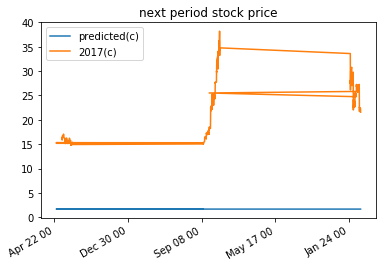

In [8]:
all_dates = data_stock.index.get_values()

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

predicted_values = predicted.flatten()
predicted_dates = all_dates[len(all_dates)-len(predicted_values): len(all_dates)]
predicted_series = pd.Series(predicted_values, index=predicted_dates)
plot_predicted,= ax.plot(predicted_series, label='predicted(c)')

test_values = y['test'].flatten()
test_dates = all_dates[len(all_dates)- len(test_values):len(all_dates)]
test_series = pd.Series(test_values, index=test_dates)
plot_test, = ax.plot(test_series, label='2017(c)')

xfmt = mdates.DateFormatter('%b %d %H')
ax.xaxis.set_major_formatter(xfmt)


plt.title('next period stock price')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()